# _(Brette, Romain. 2004)_ LIF phase locking 

Implementation of the paper:

- Brette, Romain. "Dynamics of one-dimensional spiking neuron
  models." Journal of mathematical biology 48.1 (2004): 38-56.

In [1]:
import matplotlib.pyplot as plt
import brainpy as bp
import numpy as np

In [2]:
# set parameters
num = 2000
tau = 100.  # ms
Vth = 1.  # mV
Vr = 0.  # mV
inputs = np.linspace(2., 4., num)

In [3]:
class LIF(bp.NeuGroup):
    target_backend = ['numpy', 'numba']

    def __init__(self, size, **kwargs):
        self.V = bp.ops.zeros(size)
        self.spike = bp.ops.zeros(size)
        super(LIF, self).__init__(size, **kwargs)

    @staticmethod
    @bp.odeint
    def int_f(V, t):
        return (-V + inputs + 2 * np.sin(2 * np.pi * t / tau)) / tau

    def update(self, _t):
        V = self.int_f(self.V, _t)
        self.spike = np.asarray(V >= Vth, dtype=np.float_)
        self.V = np.where(self.spike > 0., Vr, V)

In [4]:
group = LIF(num, monitors=['spike'])
group.run(duration=5 * 1000., report=True)

Compilation used 0.0010 s.
Start running ...
Run 10.0% used 0.236 s.
Run 20.0% used 0.476 s.
Run 30.0% used 0.668 s.
Run 40.0% used 0.866 s.
Run 50.0% used 1.066 s.
Run 60.0% used 1.279 s.
Run 70.0% used 1.482 s.
Run 80.0% used 1.682 s.
Run 90.0% used 1.905 s.
Run 100.0% used 2.119 s.
Simulation is done in 2.119 s.



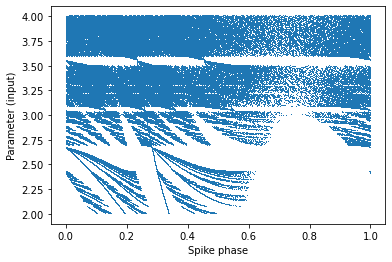

In [5]:
indices, times = bp.measure.raster_plot(group.mon.spike, group.mon.ts)
plt.plot((times % tau) / tau, inputs[indices], ',')
plt.xlabel('Spike phase')
plt.ylabel('Parameter (input)')
plt.show()